# Human Data Wrangling

This is a simple demonstration of the basic, high level functionality of the tools offered in `human_aware_rl/human/process_dataframes.py`. This notebook is far from complete, and is certainly not official documentation. However, it will hopefully provide a very hands-on introduction to this portion of the codebase, and can serve as a jumping-off point for further exploration and analysis on the user's end

In [6]:
%matplotlib inline
%matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
from human_aware_rl.static import *

set_global_seed(1884)

# Loading + Formatting

In [7]:
RAW_2019_HUMAN_DATA

'/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/raw/2019_hh_trials.csv'

In [8]:
RAW_2020_HUMAN_DATA

'/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/raw/2020_hh_trials.csv'

In [9]:
old_trials = pd.read_csv(RAW_2019_HUMAN_DATA, header=0)
new_trials = pd.read_csv(RAW_2020_HUMAN_DATA, header=0)

In [12]:
new_main_trials = format_trials_df(new_trials, False)

Layouts found ['asymmetric_advantages_tomato' 'counter_circuit' 'cramped_corridor'
 'inverse_marshmallow_experiment' 'marshmallow_experiment'
 'marshmallow_experiment_coordination' 'soup_coordination'
 'you_shall_not_pass']


In [13]:
new_main_trials.head()

,state,joint_action,reward,time_left,score,time_elapsed,cur_gameloop,layout,layout_name,trial_id,player_0_id,player_1_id,player_0_is_human,player_1_is_human,cur_gameloop_total,score_total,button_press,button_press_total,timesteps_since_interact,button_presses_per_timstep
0,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.998593,0,0.001410,1,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,0,0.638889
1,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.847521,0,0.152482,2,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,1,0.638889
2,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.696195,0,0.303809,3,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,2,0.638889
3,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.544653,0,0.455362,4,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,3,0.638889
4,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.392934,0,0.607069,5,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,4,0.638889


# MZ: Add a bit more exploration

# Basic data exploration

In [14]:
scenario_rews, worker_rews = get_trials_scenario_and_worker_rews(new_main_trials)

In [16]:
worker_rews

{'e1dfeca129874236befaad8d9e481a3e': [139, 369, 52, 183, 86, 141, 102, 291],
 '6e1413b2cb8544c59eb22023619f2e1a': [139, 369, 52, 183, 86, 141, 102, 291],
 '6de0d2bfc6dc4be79e05914d4b683efe': [235, 543, 252, 345, 486, 115, 251, 342],
 '72a6e3c31f3d4fffab55b303fc5be648': [235, 543, 252, 345, 486, 115, 251, 342],
 '6eeb90a3ecee4c7c9d2c954177bfbc45': [252, 198, 68, 131, 282, 204, 408, 378],
 '6503606913484adc98a4280b2ddde43b': [252, 198, 68, 131, 282, 204, 408, 378],
 '15b445e01df24e9b946bed435a07507b': [13, 117, 141, 102, 68, 13, 117, 0],
 '44cc88f797dd40b09a48a7f711f80acc': [13, 117, 141, 102, 68, 13, 117, 0],
 '65bd15bcaca64888bdeb2b1caf99d096': [180, 298, 252, 456, 253, 196, 328, 183],
 '4fe0e5b45e12404eb93ddca2809ec128': [180, 298, 252, 456, 253, 196, 328, 183],
 'e4215861afea40a5bbe87f1ca2380345': [271, 266, 165, 234, 283, 55, 330, 272],
 '8eeab30c8ec44545b1c1fed19168cc62': [271, 266, 165, 234, 283, 55, 330, 272],
 'c6a4b5836d5d4e3f91349983aa7c55a5': [243, 204, 259, 162, 329, 230, 23

### Reward by-layout

In [17]:
get_dict_stats(scenario_rews)

NameError: name 'get_dict_stats' is not defined

<IPython.core.display.Javascript object>


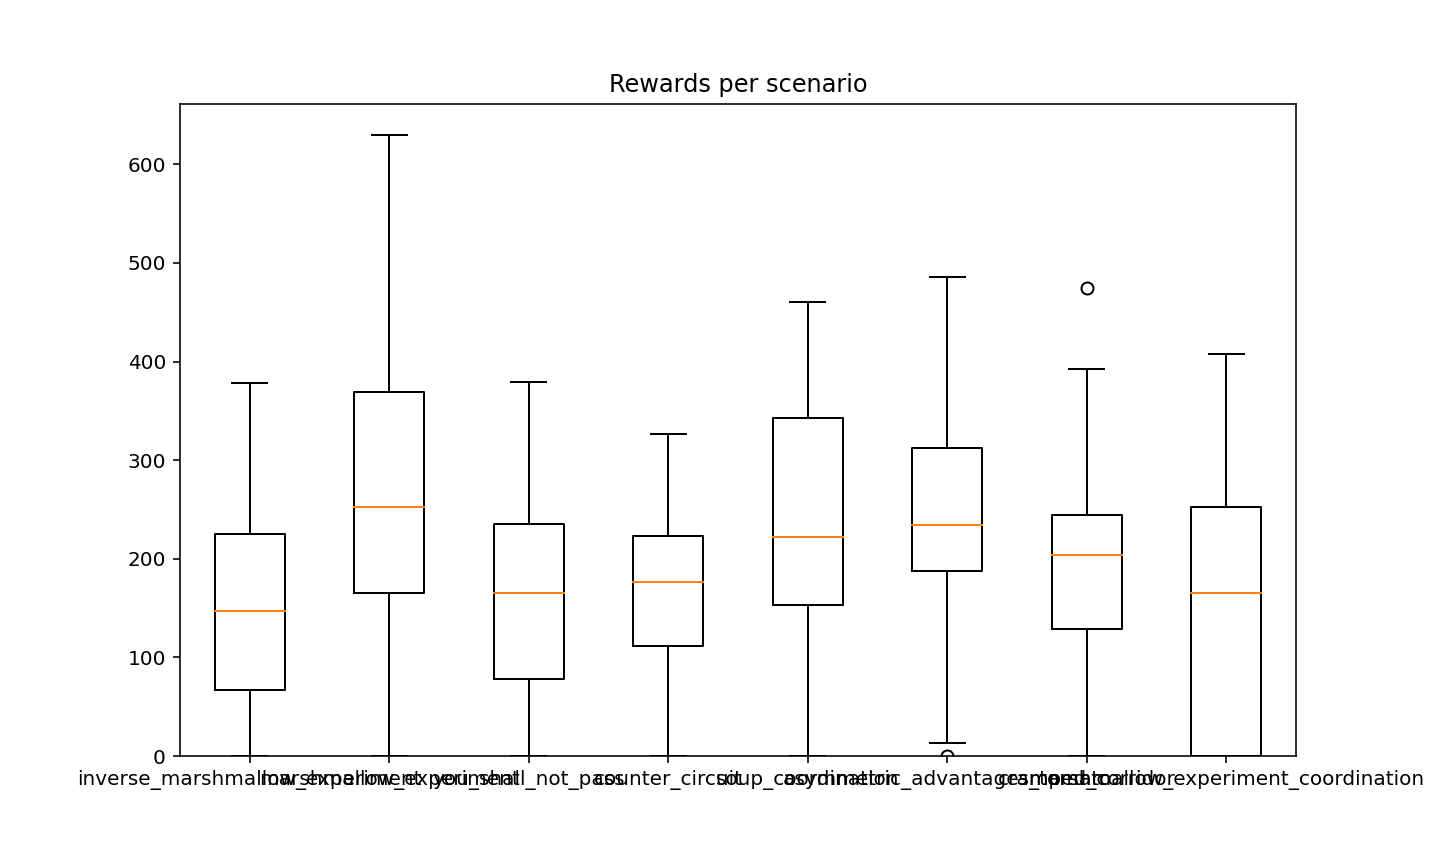

In [39]:
plt.figure(figsize=(10, 6))
plt.title("Rewards per scenario")
plt.boxplot(list(scenario_rews.values()), labels=list(scenario_rews.keys()))
plt.ylim(0,)
plt.show()

### Reward by-worker